In [45]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as o

# Task 1

We start by finding the closest $x$ by the least squares method. We can do this by solving the system $$A^\text{t}Ax=A^\text{t}b$$
We will use the built in function `linalg.solve` from numpy to solve a linear system of equations.

In [46]:
A = np.array([[1, 1, 2], [1, 2, 1], [2, 1, 1], [2, 2, 1]])
b = np.array([1, -1, 1, -1])
np.linalg.solve(A.T @ A, A.T @ b)

array([ 0.6       , -1.4       ,  0.94285714])

For solving the problem with `scipy.optimize.fmin` we will define the function $f$ to calculate the distance between $b$ and $Ax$.

In [47]:
def f(x):
    return np.linalg.norm(A @ x - b)


minimum = o.fmin(f, np.array([1, 1, 1]))
print(minimum)

Optimization terminated successfully.
         Current function value: 0.507093
         Iterations: 98
         Function evaluations: 173
[ 0.59997294 -1.39999028  0.94287139]


We find that the optimizer finds the correct result, within some error region.

minimum value = 3.3809551144114465e-05
a = 2.0002000200020005


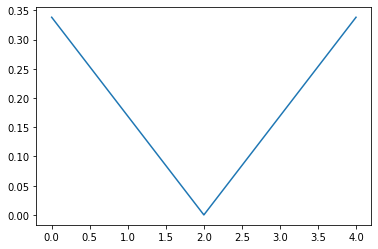

In [48]:
results = []
min_idx = 0
min_val = 100
a_values = np.linspace(0, 4, 10000)
for i in a_values:
    b = np.array([1, i, 1, i]).T
    x = np.linalg.solve(A.T @ A, A.T @ b)
    res = np.linalg.norm((A @ x) - b)
    if res < min_val:
        min_val = res
        min_idx = i
    results.append(res)
plt.plot(a_values, results)
print('minimum value =', min_val)
print('a =', min_idx)

When plotting over all values for $a$ we see that the distance between $Ax$ and $b$ equals zero at $a=2$. This corresponds to the fact that the system of equations $Ax=b$ for the given $A$ and $b$ will only have a solution when $a=2$, but will be over-determined for all other values of $a$

# Task 2

We calculate the iterates by calculating $Ax$ where $A$ is the coefficient matrix for the system of equations, and $x$ is the current values for $a$, $b$ and $c$

[[         8          3         12]
 [        41         24         37]
 [       187         84        191]
 [       821        348        817]
 [      3499       1380       3503]
 [     14645       5532      14641]
 [     60523      22116      60527]
 [    247925      88476     247921]
 [   1009195     353892    1009199]
 [   4089269    1415580    4089265]
 [  16514539    5662308   16514543]
 [  66530549   22649244   66530545]
 [ 267539371   90596964  267539375]
 [1074409013  362387868 1074409009]]


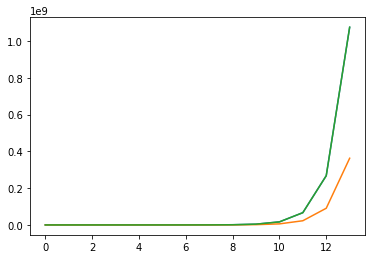

In [58]:
A = np.array([[1, 3, 2], [-3, 4, 3], [2, 3, 1]])
x = np.array([8, 3, 12])
r_z = [x]
limit = 13
for i in range(limit):
    x = A @ x
    r_z.append(x)
r_z = np.array(r_z)
plt.plot(r_z)
print(r_z)

We see that the values keep increasing, which means that $z$ does not have an limit. After 25 iterations we get overflow problems in python, which gives missleading results. However we notice that each iteration the values get multiplied by 4. 

For the next subproblem we normalize $x$ in each step.

[[0.54307539 0.20365327 0.81461308]
 [0.68087903 0.39856333 0.6144518 ]
 [0.66740612 0.2997974  0.68168218]
 [0.67885235 0.2877474  0.67554491]
 [0.68075463 0.26848854 0.68153286]
 [0.6832442  0.25808856 0.68305758]
 [0.68460076 0.25016325 0.684646  ]
 [0.68562    0.24467446 0.68560894]
 [0.68632132 0.24067066 0.68632404]
 [0.68683014 0.23775961 0.68682947]
 [0.68719856 0.23561844 0.68719873]
 [0.68746872 0.23403755 0.68746868]
 [0.68766772 0.23286519 0.68766773]
 [0.68781504 0.23199342 0.68781504]
 [0.68792444 0.23134374 0.68792444]
 [0.68800589 0.23085879 0.68800589]
 [0.68806665 0.23049637 0.68806665]
 [0.68811202 0.23022529 0.68811202]
 [0.68814595 0.23002238 0.68814595]
 [0.68817134 0.22987043 0.68817134]
 [0.68819035 0.22975659 0.68819035]
 [0.68820459 0.22967128 0.68820459]
 [0.68821525 0.22960734 0.68821525]
 [0.68822325 0.22955941 0.68822325]
 [0.68822924 0.22952348 0.68822924]
 [0.68823373 0.22949653 0.68823373]]


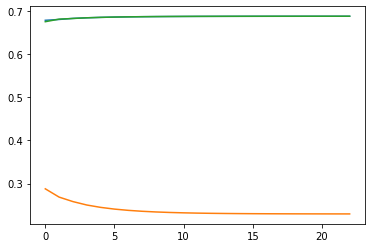

In [62]:
A = np.array([[1, 3, 2], [-3, 4, 3], [2, 3, 1]])
x = np.array([8, 3, 12])
x = x / np.linalg.norm(x)
r_v = [x]
limit = 25
for i in range(limit):
    x = A @ x
    x = x / np.linalg.norm(x)
    r_v.append(x)
r_v = np.array(r_v)
print(r_v)
plt.plot(range(limit + 1 - 3), r_v[3:])

We see that all components converge to values. These values correspond to a vector $x$ with the property that $Ax=\frac{x}{||x||}=\frac{1}{||x||}\cdot x$. This is one of the eigenvectors for the matrix $A$. The iterates $\textbf{z}$ are approaching the same group of eigenvectors. We can compute these eigenvectors with the function `linalg.eig(A)` from `numpy`. This gives us the corresponding eigenvalue, namely 4.

In [51]:
q = [r_v[i].T @ A @ r_v[i] for i in range(len(r_v))]
print(q[-4:])

[4.000835187690584, 4.000626267281087, 4.000469631021826, 4.00035218421638]


We see that the values converge to 4, which is one of the eigenvalue for $A$

For the next question we will iterate over the function until we get under the specified distance, to get the number of iterations required

Steps needed for vn-v<10^-8 is 57


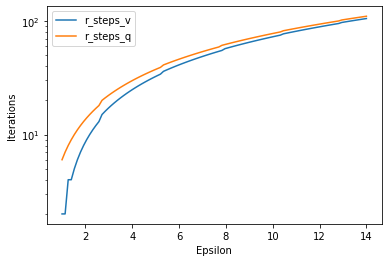

In [52]:
v = np.linalg.eig(A)[1][:, 2]
x = np.array([8, 3, 12])


def steps(x, comp):
    iterations = 0;
    while comp(x):
        x = A @ x
        x = x / np.linalg.norm(x)
        iterations += 1
    return iterations


def steps_v(x, epsilon):
    return steps(x, lambda x: np.linalg.norm(x - v) > epsilon)


print('Steps needed for vn-v<10^-8 is', steps_v(x, 10 ** -8))

epsilon_vals = np.linspace(1, 14, 100)
r_steps_v = [steps_v(x, 10 ** -i) for i in epsilon_vals]
plt.semilogy(epsilon_vals, r_steps_v, label='r_steps_v')


def steps_q(x, epsilon):
    return steps(x, lambda x: x @ A @ x - 4 > epsilon)


r_steps_q = [steps_q(x, 10 ** -i) for i in epsilon_vals]
plt.semilogy(epsilon_vals, r_steps_q, label='r_steps_q')
plt.xlabel('Epsilon')
plt.ylabel('Iterations')
plt.legend()
plt.show()

We see that $v_n$ starts off with a better estimate of $v$ than $q_n$ does for $q$, since we need less iterations to reach a sufficiently close value. This continues for the whole range between 0.1 and $10^{14}$. Other than the starting difference, both sequences seem to converge at the same rate.

# Task 3

We will solve the task by solving for $x_1$ in dependence of $x_2$ and $x_3$. For this exercise we will use $x$, $y$ and $z$ instead of $x_i$ to get code that is easier to read.

In [53]:
import sympy as sp

x, y, z = sp.symbols('x y z')
equation = sp.Eq(2 * x ** 2 - y ** 2 + 2 * z ** 2 - 10 * x * y - 4 * x * z + 10 * y * z, 1)
sols = sp.solveset(equation, z)
sols

FiniteSet(x - 5*y/2 - sqrt(27*y**2 + 2)/2, x - 5*y/2 + sqrt(27*y**2 + 2)/2)

We will plot these eqations with the function `plot3d` from `sympy` for the two branches found by `solveset`

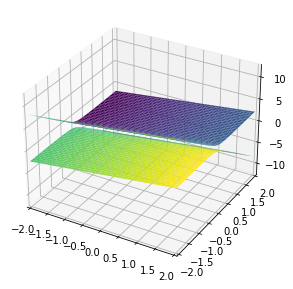

In [54]:
sp.plotting.plot3d(sols.args[0], sols.args[1], (x, -2, 2), (y, -2, 2))

We see that we get two disconnected sheets which only curve in one direction. This is caracteristic for a hyperbolic cylinder. Going through the theory we get that we have one positive, one negative and one zero eigenvalue, which corresponds to an hyperbolic cylinder since $c\neq0$